# BANK CUSTOMER CHURN PREDICTION USING ENSEMBLE - EXTREME GRADIENT BOOSTING (XGBOOST) CLASSIFIER ALGORITHM

## 1. IMPORTING THE PYTHON LIBRARIES

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import export_graphviz, export_text
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

import graphviz
import pydotplus

from itertools import product

print("Python Libraries Import Completed")

Python Libraries Import Completed


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. LOADING THE RAW DATA FROM A CSV FILE

In [3]:
actual_raw_data = pd.read_csv("/Users/vidhyalakshmiparthasarathy/.CMVolumes/Google-Drive-pbvidhya/~~~VP_Data_Science/DS_Real_Time_Projects/Bank_Customers_Churn_Prediction_Using_7_Various_Classification_Algorithms/data/Bank_Churn_Raw_Data.csv")

print("Raw Data Import Completed")

Raw Data Import Completed


## 3. DATA EXPLORATION

In [4]:
# Verifying the shape of the data

actual_raw_data.shape

(10000, 14)

In [5]:
# Displaying the first 5 Rows of Data Instances

actual_raw_data.head()

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]

In [6]:
# Displaying the last 5 Rows of Data Instances

actual_raw_data.tail()

RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...               0        38190.78      0

[5 rows x 14 columns]

In [7]:
# Verifying the Column Names in the Raw Data

actual_raw_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
# Verifying the Type of the Columns in the Raw Data

actual_raw_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
# Verifying the Null Values in the Raw Data

actual_raw_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 4. DATA VISUALISATION

In [10]:
# Creating a New Data Frame To Include Only the Relevant Input Independent Variables and the Output Dependent Variable

raw_data = actual_raw_data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
                           'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                           'EstimatedSalary', 'Exited']]

raw_data

CreditScore Geography  Gender  ...  IsActiveMember  EstimatedSalary  Exited
0             619    France  Female  ...               1        101348.88       1
1             608     Spain  Female  ...               1        112542.58       0
2             502    France  Female  ...               0        113931.57       1
3             699    France  Female  ...               0         93826.63       0
4             850     Spain  Female  ...               1         79084.10       0
...           ...       ...     ...  ...             ...              ...     ...
9995          771    France    Male  ...               0         96270.64       0
9996          516    France    Male  ...               1        101699.77       0
9997          709    France  Female  ...               1         42085.58       1
9998          772   Germany    Male  ...               0         92888.52       1
9999          792    France  Female  ...               0         38190.78       0

[10000 rows x 11 columns]

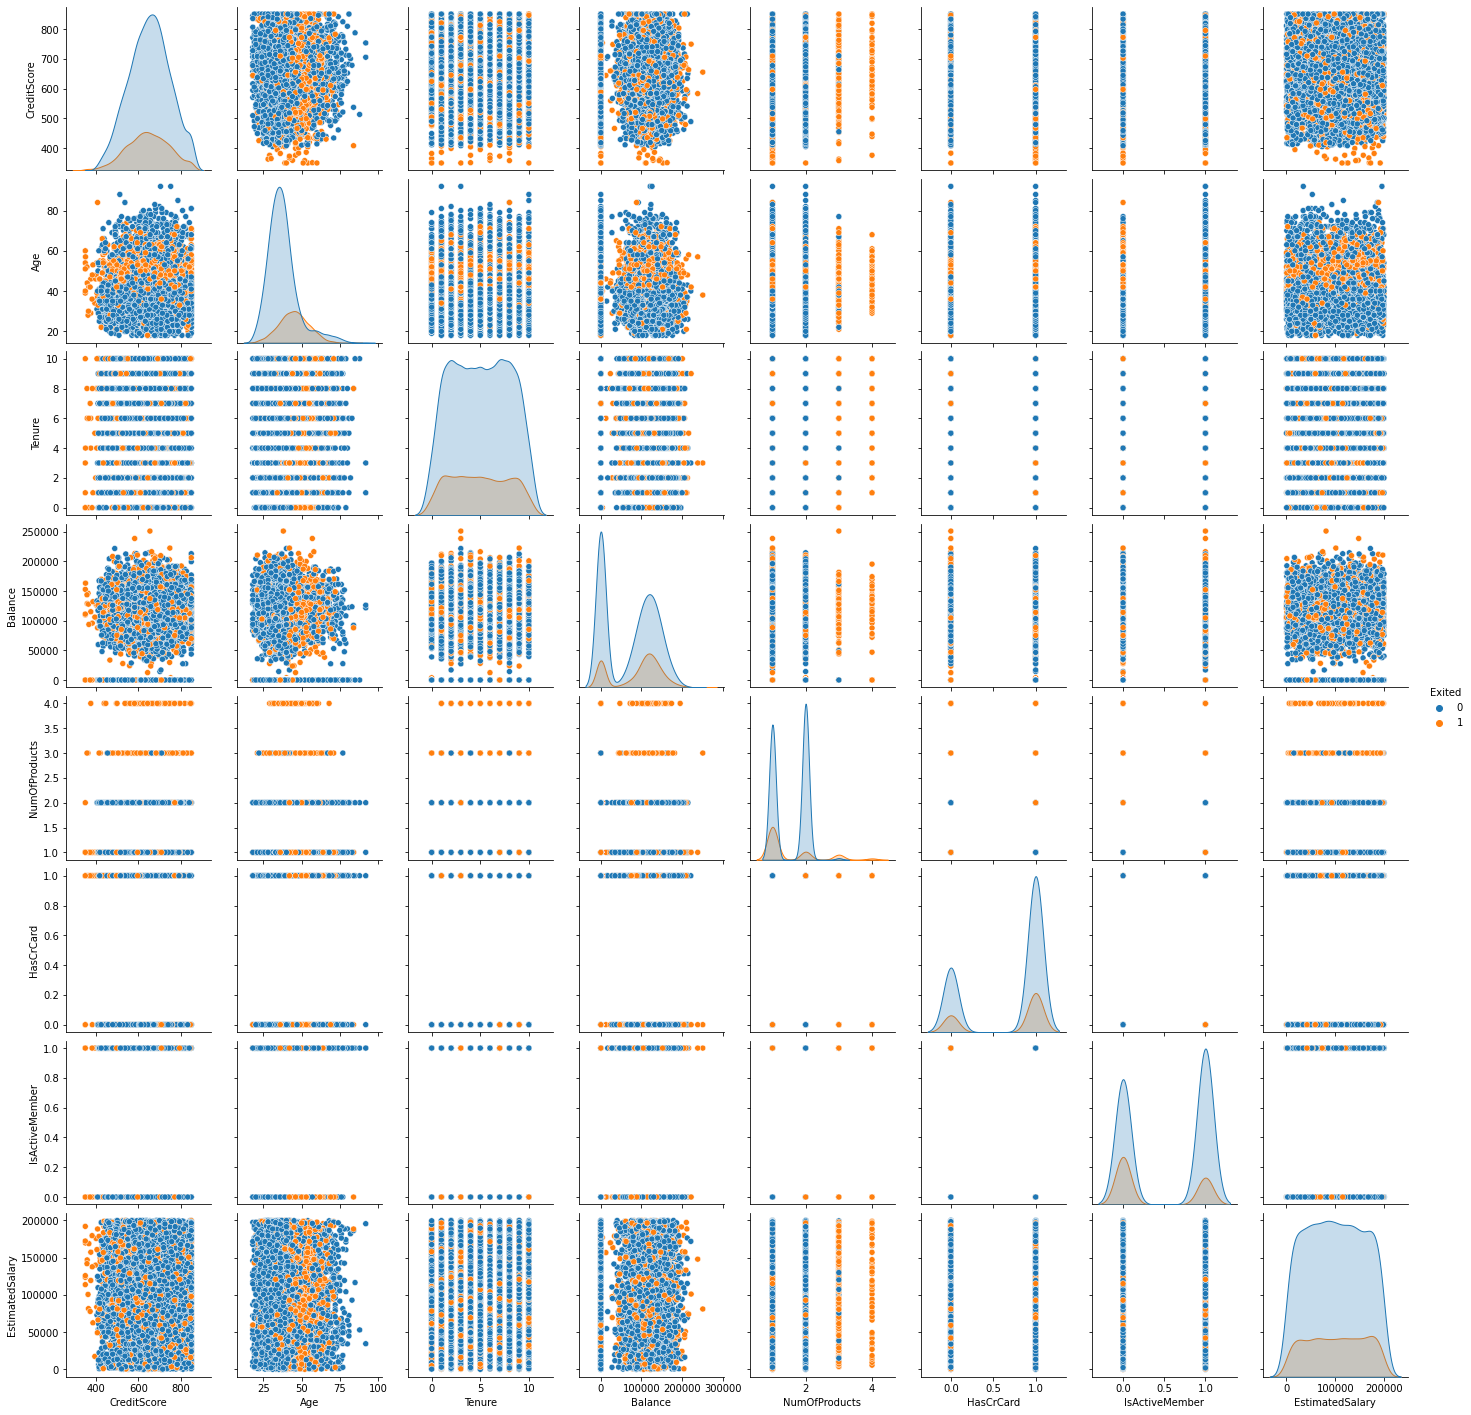

In [11]:
# Pair Plot - Visualising the Relationship Between The Variables

raw_data_graph = sns.pairplot(raw_data, hue='Exited', diag_kws={'bw_method':0.2})

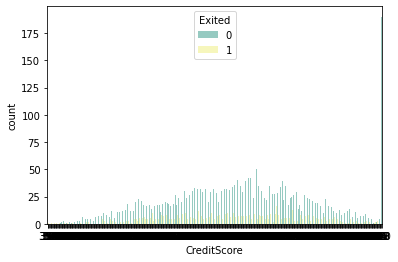

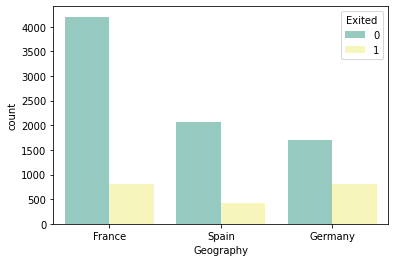

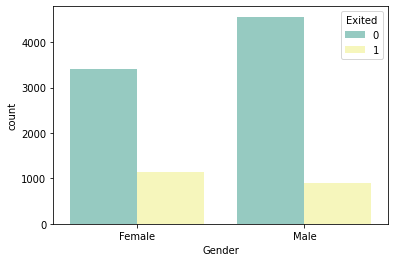

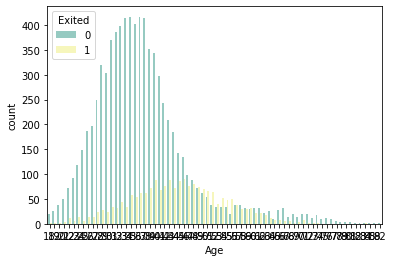

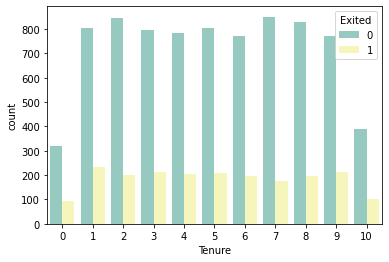

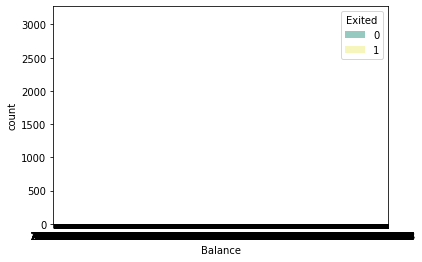

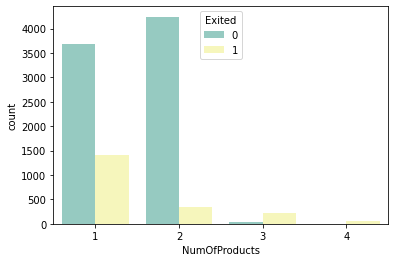

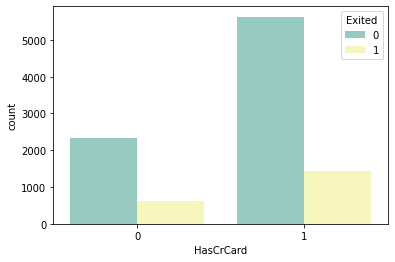

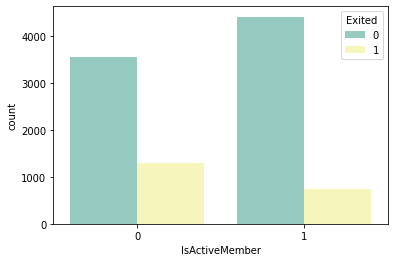

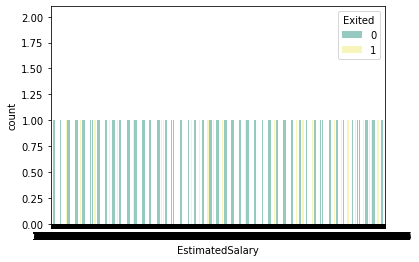

In [12]:
# Count Plot - Visualising the Relationship Between Each OF The Input Independent Variables and the Output Dependent Variable

input_features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
                 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                 'EstimatedSalary']

for feature in input_features:
    plt.figure()
    feature_count_plot = sns.countplot(x=feature, data=raw_data, hue='Exited', palette="Set3")

### Scatter Plot - Visualising the Relationship Between Each OF The Input Independent Variables and the Output Dependent Variable

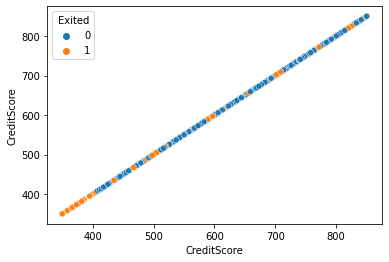

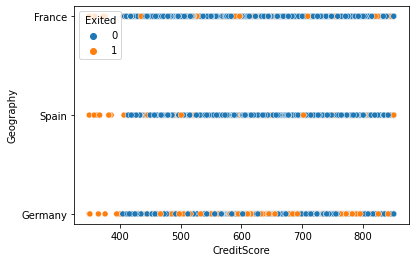

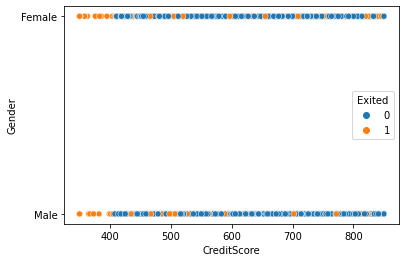

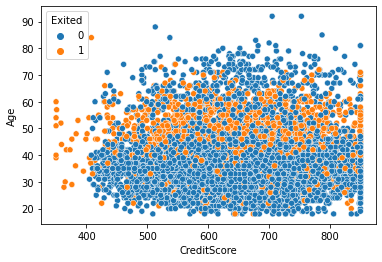

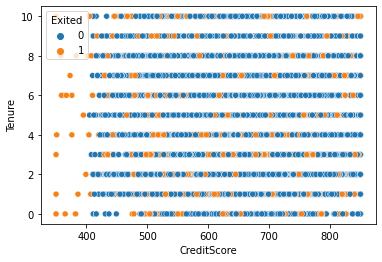

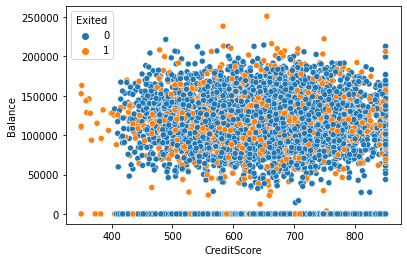

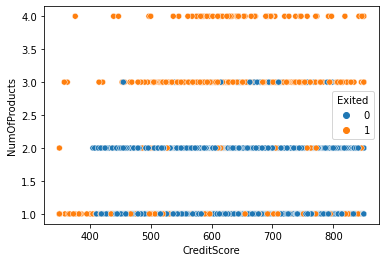

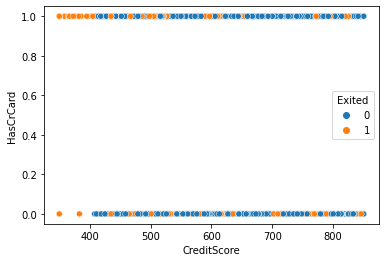

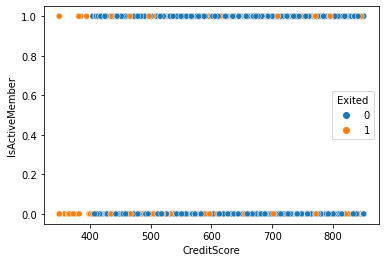

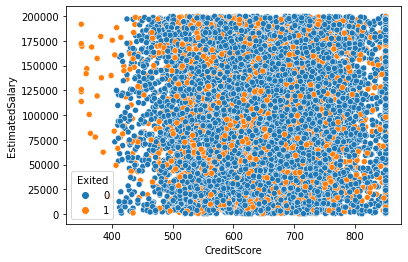

In [13]:
# Scatter Plot - Visualising the Relationship Between Each OF The Input Independent Variables and the Output Dependent Variable

input_features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
                 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                 'EstimatedSalary']

# Input Variable 'CreditScore'

for feature in input_features:
    plt.figure()
    feature_scatter_plot_1 = sns.scatterplot(data=raw_data, x='CreditScore', y=feature, hue='Exited')

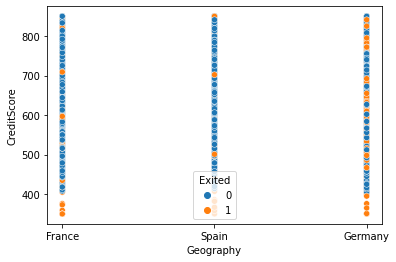

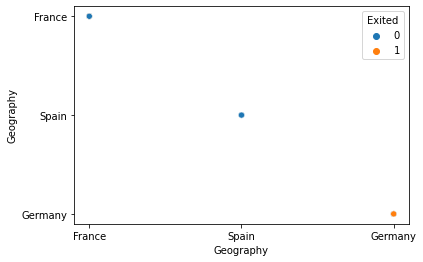

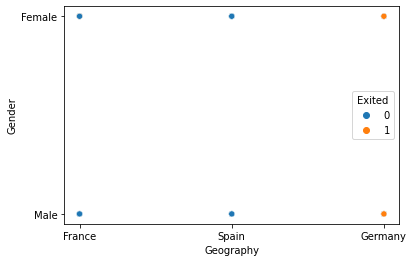

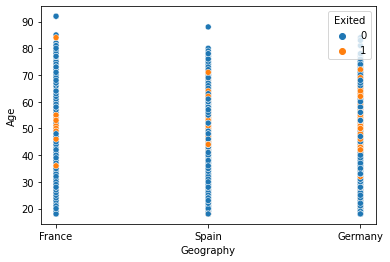

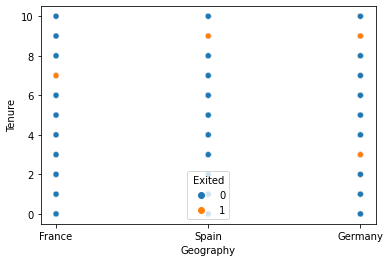

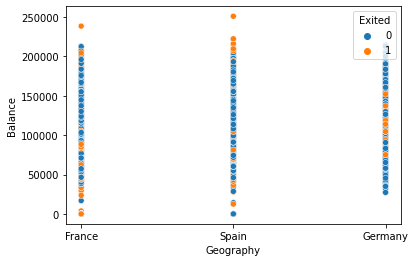

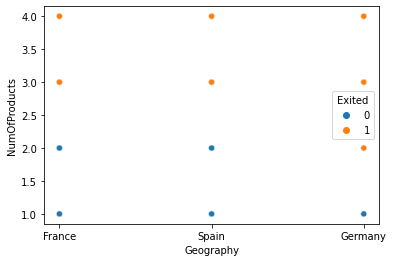

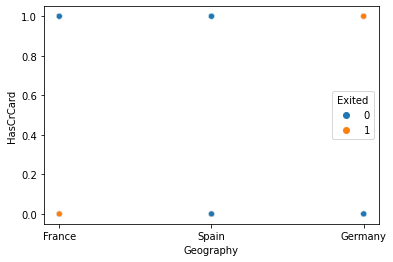

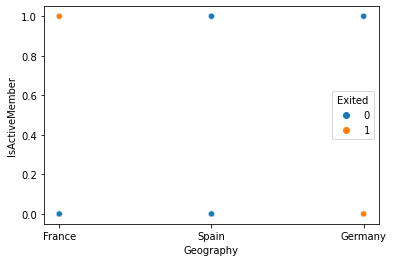

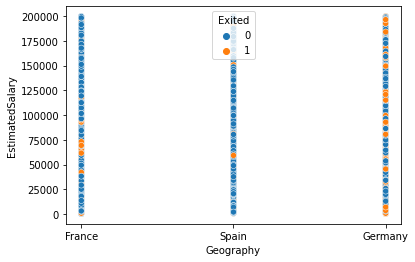

In [14]:
# Input Variable 'Geography'

for feature in input_features:
    plt.figure()
    feature_scatter_plot_2 = sns.scatterplot(data=raw_data, x='Geography', y=feature, hue='Exited')

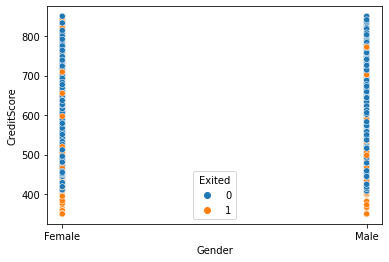

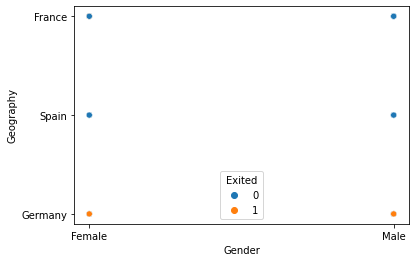

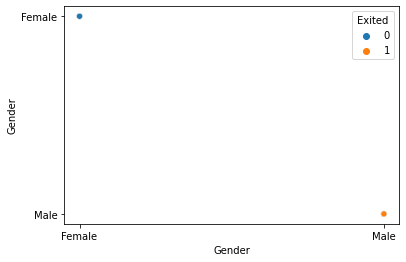

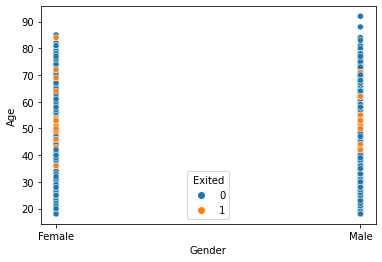

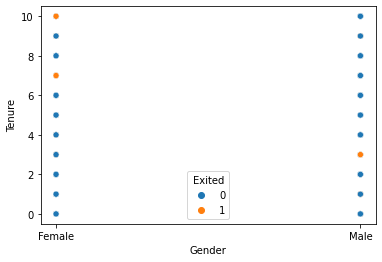

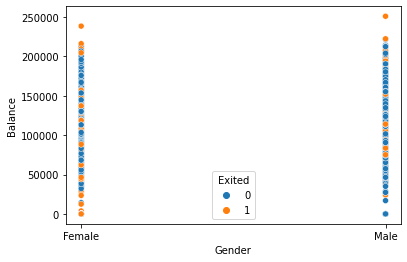

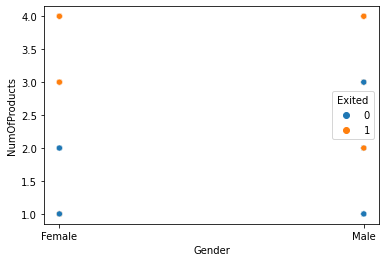

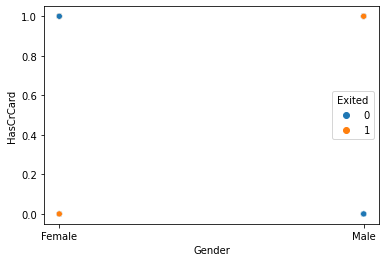

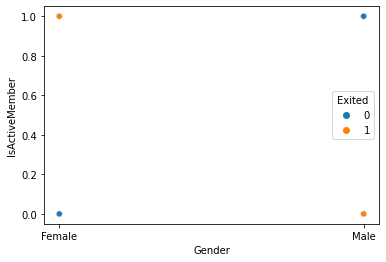

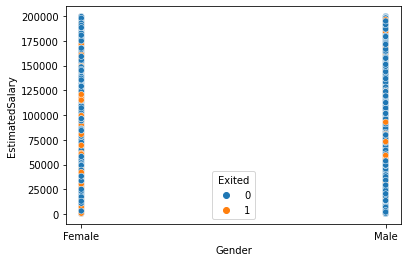

In [15]:
# Input Variable 'Gender'

for feature in input_features:
    plt.figure()
    feature_scatter_plot_3 = sns.scatterplot(data=raw_data, x='Gender', y=feature, hue='Exited')

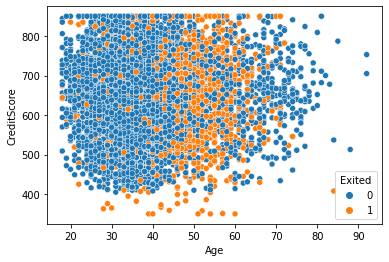

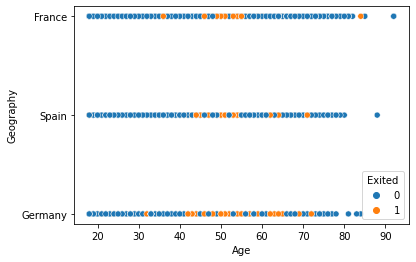

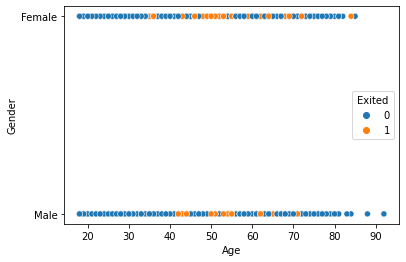

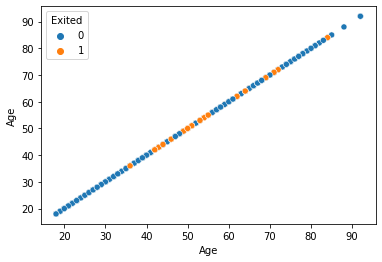

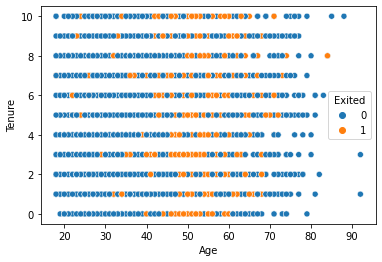

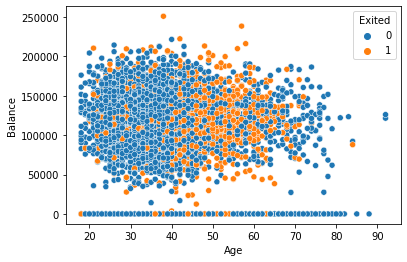

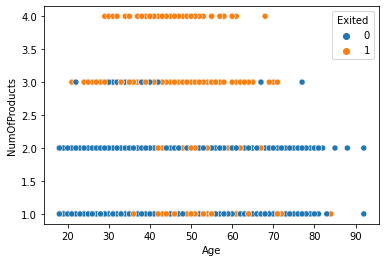

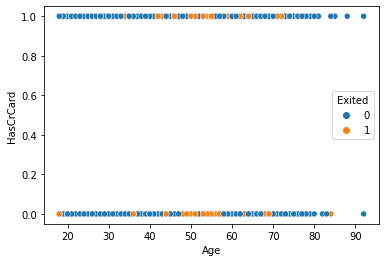

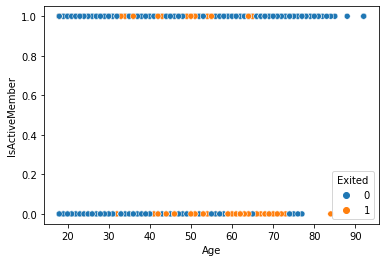

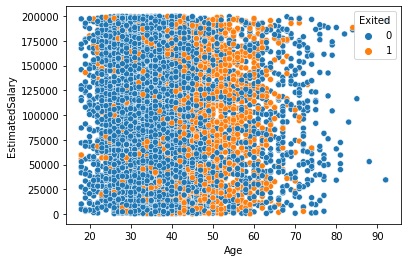

In [16]:
# Input Variable 'Age'

for feature in input_features:
    plt.figure() 
    feature_scatter_plot_4 = sns.scatterplot(data=raw_data, x='Age', y=feature, hue='Exited')

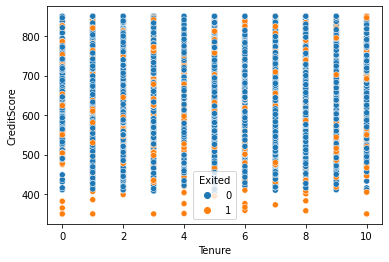

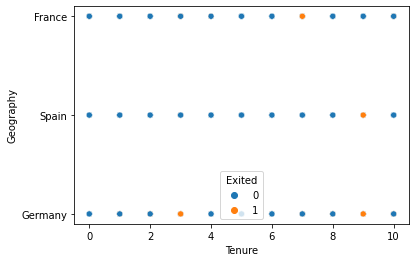

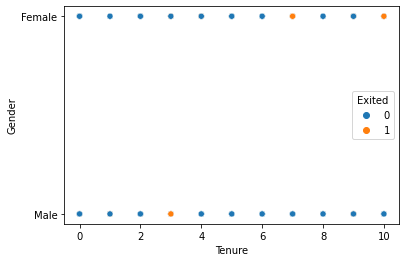

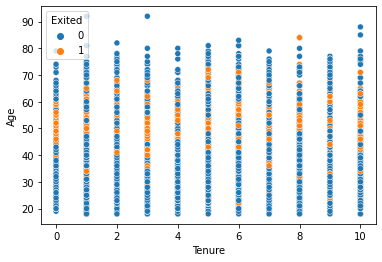

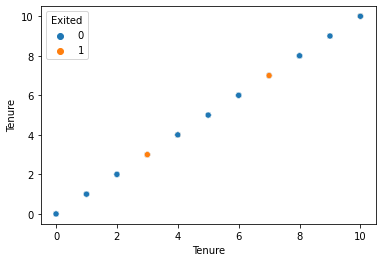

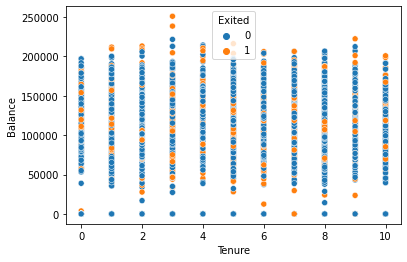

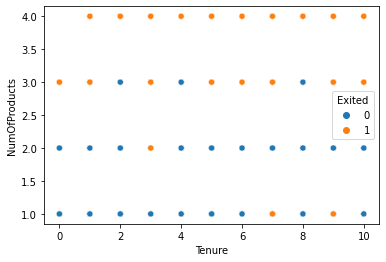

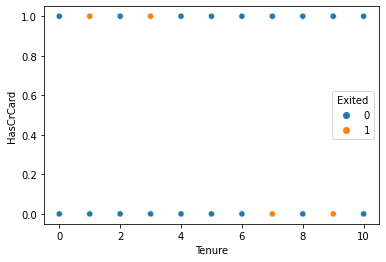

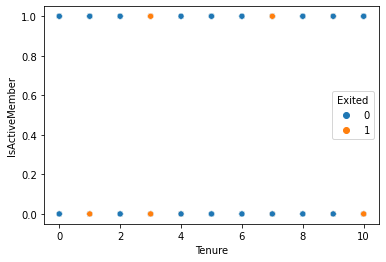

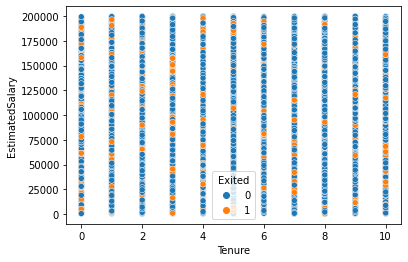

In [17]:
# Input Variable 'Tenure'

for feature in input_features:
    plt.figure()
    feature_scatter_plot_5 = sns.scatterplot(data=raw_data, x='Tenure', y=feature, hue='Exited')

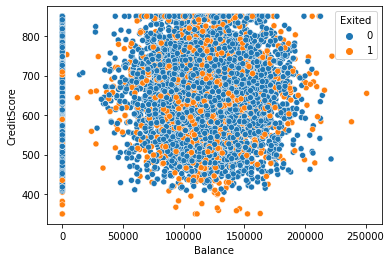

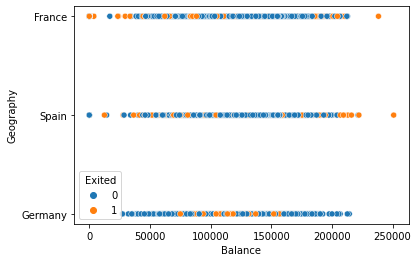

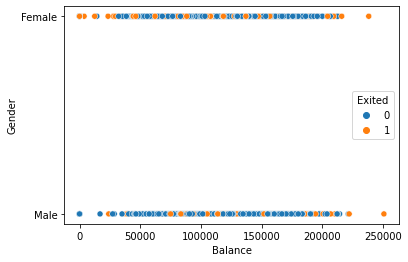

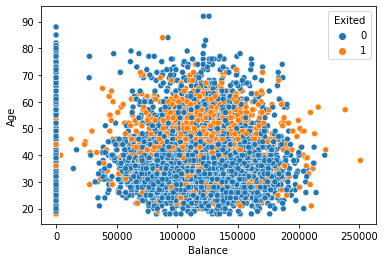

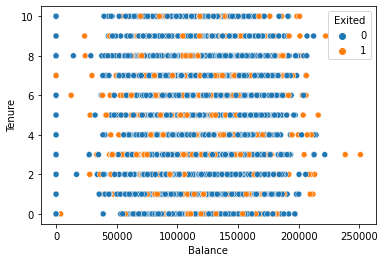

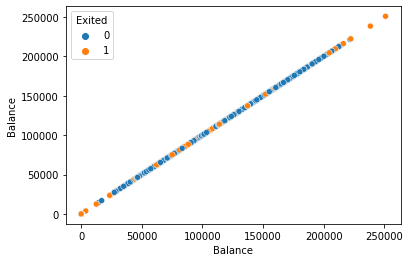

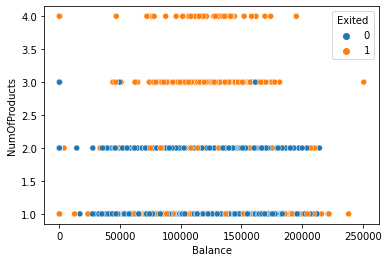

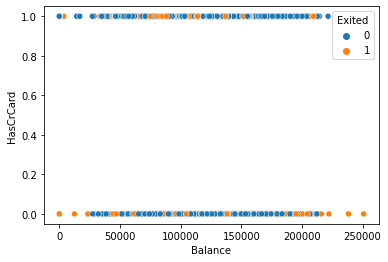

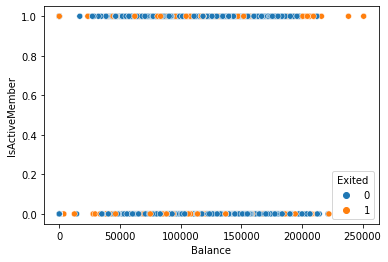

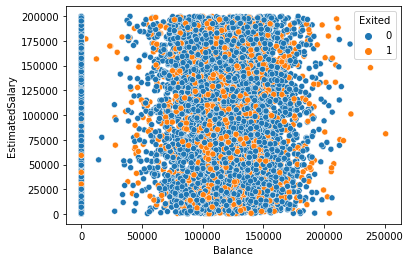

In [18]:
# Input Variable 'Balance'

for feature in input_features:
    plt.figure()
    feature_scatter_plot_6 = sns.scatterplot(data=raw_data, x='Balance', y=feature, hue='Exited')

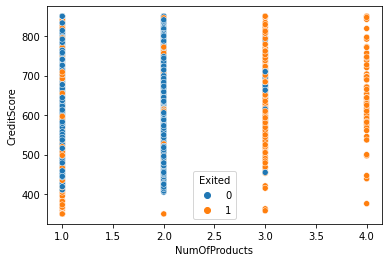

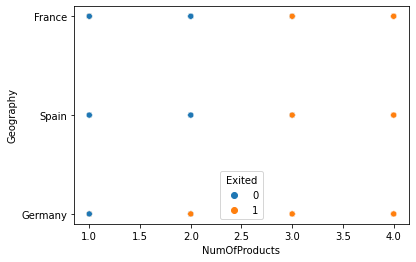

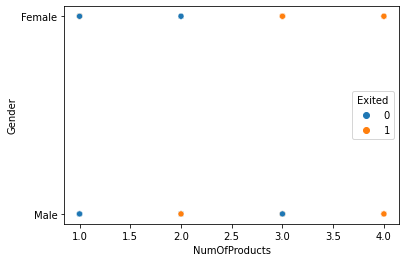

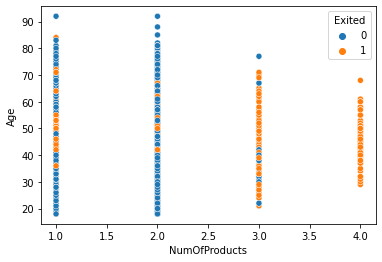

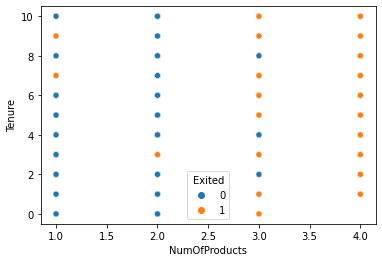

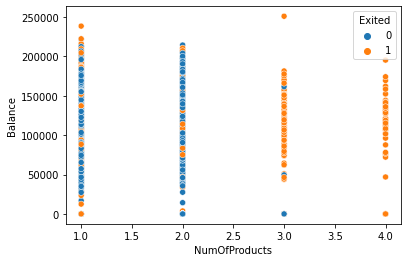

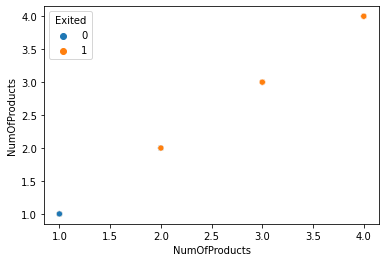

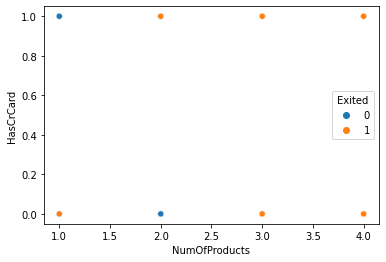

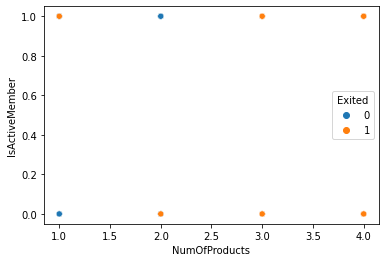

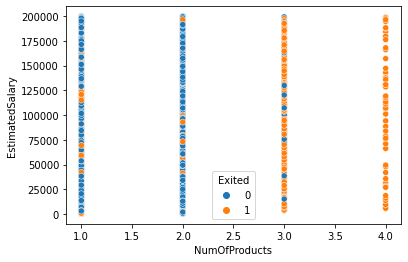

In [19]:
# Input Variable 'NumOfProducts'

for feature in input_features:
    plt.figure()
    feature_scatter_plot_7 = sns.scatterplot(data=raw_data, x='NumOfProducts', y=feature, hue='Exited')

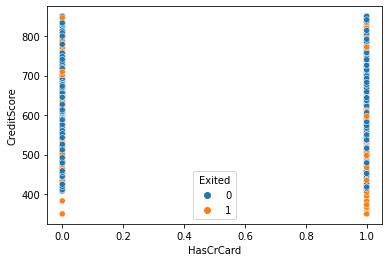

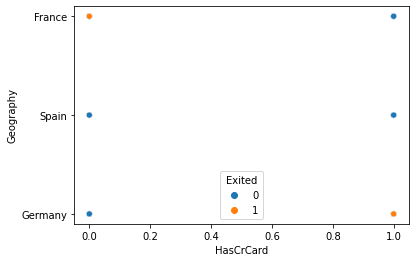

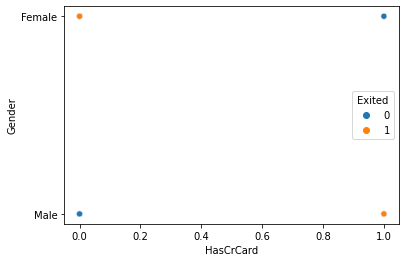

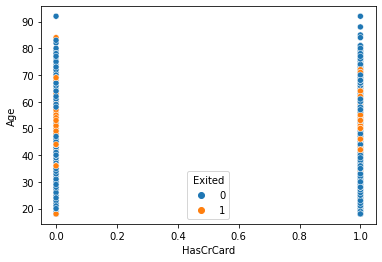

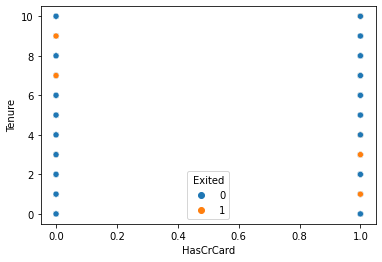

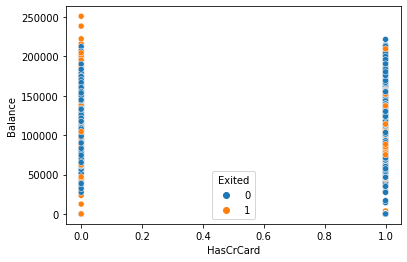

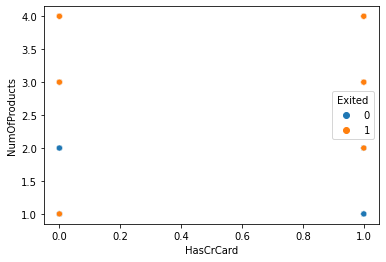

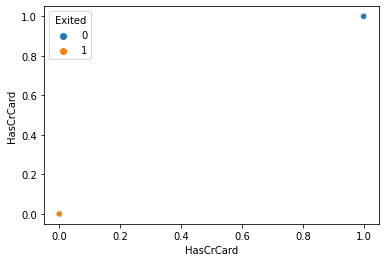

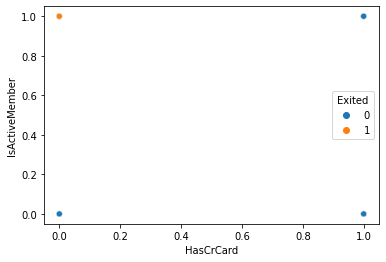

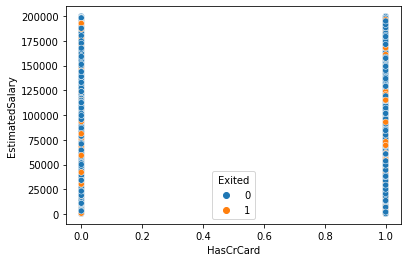

In [20]:
# Input Variable 'HasCrCard'

for feature in input_features:
    plt.figure()
    feature_scatter_plot_8 = sns.scatterplot(data=raw_data, x='HasCrCard', y=feature, hue='Exited')

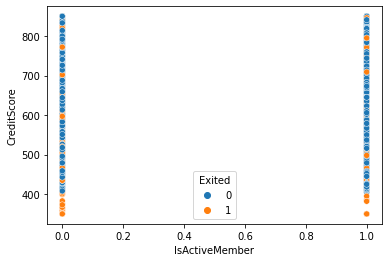

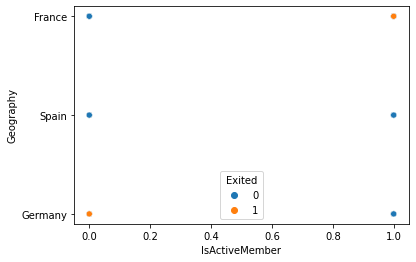

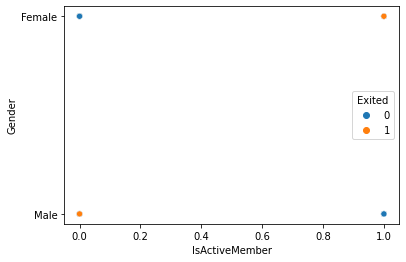

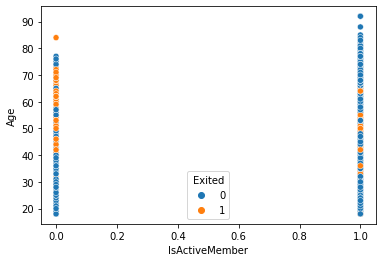

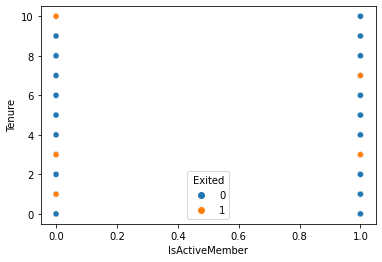

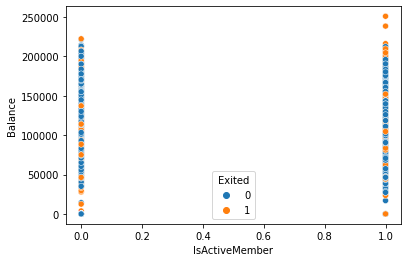

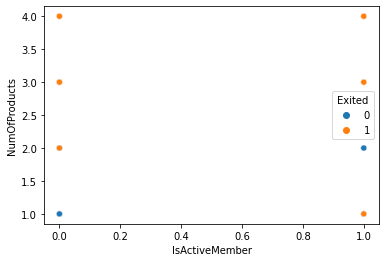

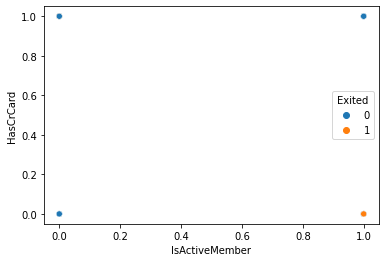

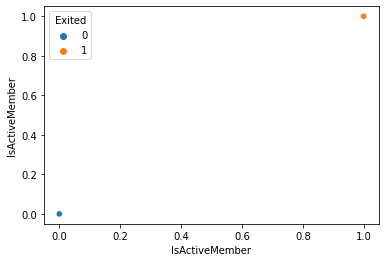

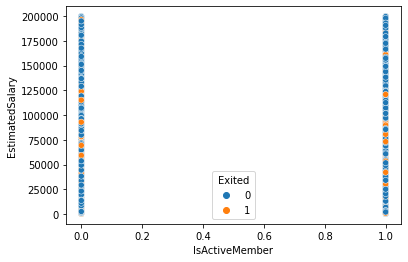

In [21]:
# Input Variable 'IsActiveMember'

for feature in input_features:
    plt.figure()
    feature_scatter_plot_9 = sns.scatterplot(data=raw_data, x='IsActiveMember', y=feature, hue='Exited')

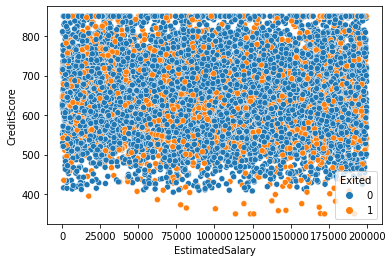

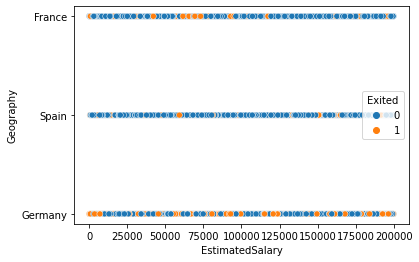

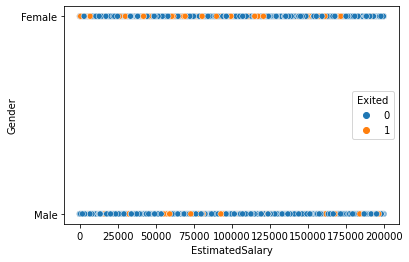

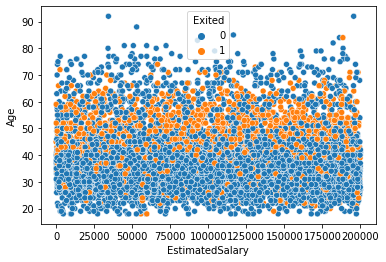

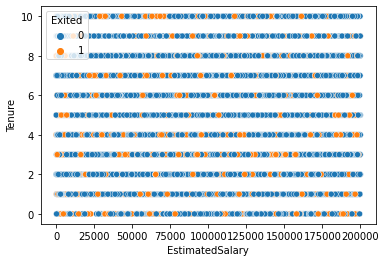

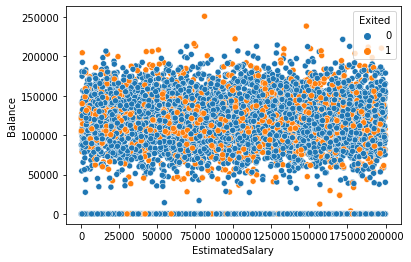

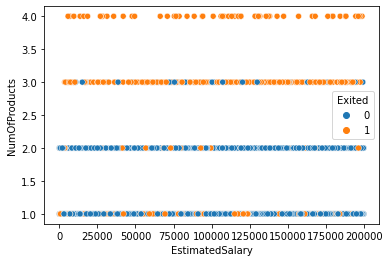

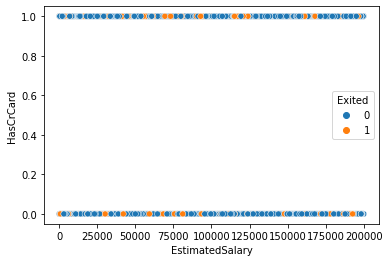

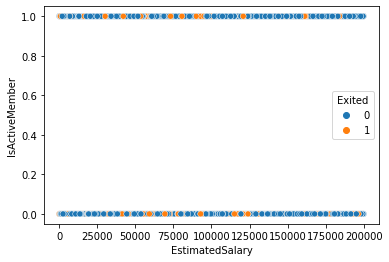

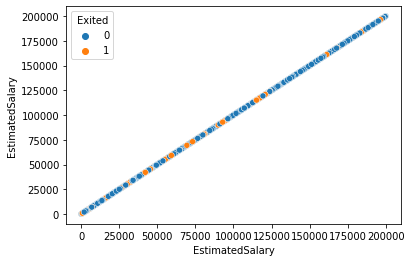

In [22]:
# Input Variable 'EstimatedSalary'

for feature in input_features:
    plt.figure()
    feature_scatter_plot_10 = sns.scatterplot(data=raw_data, x='EstimatedSalary', y=feature, hue='Exited')

## 5. DATA PRE-PROCESSING

In [23]:
# Converting the Categorical Variables into Numeric One-Hot Encoded Variables for Decision Tree IDE Model Training Purposes

raw_data_pp = pd.get_dummies(raw_data, columns=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])

print("Execution Completed")

Execution Completed


In [24]:
# Verifying the Columns of the Pre-processed Raw Data Frame after Applying One-Hot Encoding Method

raw_data_pp.head()

CreditScore  Age  Tenure  ...  HasCrCard_1  IsActiveMember_0  IsActiveMember_1
0          619   42       2  ...            1                 0                 1
1          608   41       1  ...            0                 0                 1
2          502   42       8  ...            1                 1                 0
3          699   39       1  ...            0                 1                 0
4          850   43       2  ...            1                 0                 1

[5 rows x 16 columns]

In [25]:
# Verifying the Shape of the Pre-processed Raw Data Frame after Applying One-Hot Encoding Method

raw_data_pp.shape

(10000, 16)

In [26]:
# Normalising the Continuous Variables Columns to Scale to a Value Between 0 and 1 for Decision Tree IDE Model Training Purposes

norm_scale_features = ['CreditScore', 'Age', 'Balance','EstimatedSalary']

norm_scale = MinMaxScaler()

raw_data_pp[norm_scale_features] = norm_scale.fit_transform(raw_data_pp[norm_scale_features])

print("Scaling is Completed")

Scaling is Completed


In [27]:
# Verifying all the Columns of the Final Pre-processed Raw Data Frame after Applying the Scaling Method

raw_data_pp.head()

CreditScore       Age  ...  IsActiveMember_0  IsActiveMember_1
0        0.538  0.324324  ...                 0                 1
1        0.516  0.310811  ...                 0                 1
2        0.304  0.324324  ...                 1                 0
3        0.698  0.283784  ...                 1                 0
4        1.000  0.337838  ...                 0                 1

[5 rows x 16 columns]

In [28]:
# Verifying the Shape of the Pre-processed Raw Data Frame after Applying the Scaling Method

raw_data_pp.shape

(10000, 16)

## 6. DATA SPLIT AS TRAIN DATA AND VALIDATION DATA

In [29]:
# Defining the Input and the Target Vectors for Decision Tree IDE Model Training Purposes

# Input (Independent) Features/Attributes
X = raw_data_pp.drop('Exited', axis=1).values

# Output (Dependent) Target Attribute
y = raw_data_pp['Exited'].values

print("Execution Completed")

Execution Completed


In [30]:
# Verifying the Shape of the Input and the Output Vectors

print("The Input Vector Shape is {}".format(X.shape))
print("The Output Vector Shape is {}".format(y.shape))

The Input Vector Shape is (10000, 15)
The Output Vector Shape is (10000,)


In [31]:
# Splitting the Data Between Train and Validation Data

X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=1)

print("Execution Completed")

Execution Completed


In [32]:
# Verifying the Shape of the Train and the Validation Data

print("Input Train: {}".format(X_train.shape))
print("Output Train: {}\n".format(y_train.shape))
print("Input Validation: {}".format(X_validate.shape))
print("Output Validation: {}".format(y_validate.shape))

Input Train: (9000, 15)
Output Train: (9000,)

Input Validation: (1000, 15)
Output Validation: (1000,)


## 7. TRAINING THE ENSEMBLE - EXTREME GRADIENT BOOSTING (XGBOOST) CLASSIFIER WITH THE DEFAULT PARAMETERS VALUES

In [38]:
# Creating an Instance of the XGBoost Classifier Model with the Default Parameter Values
xgboost_model = XGBClassifier(n_estimators=1, max_depth=2, learning_rate=0.05,
                              booster='gbtree', tree_method='exact',
                              n_jobs=0, gamma=0, min_child_weight=1.0,
                              max_delta_step=1.0, subsample=0, colsample_bytree=0.3,
                              colsample_bylevel=0.3, colsample_bynode=0.3,
                              reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=0.0,
                              base_score=(0.1), random_state=0)

print("Model Training Started.....")

# Training the XGBoost Classifier Model
xgboost_model.fit(X_train, y_train)

print("Model Training Completed.....")

Model Training Started.....
Model Training Completed.....


## 8. EXTRACTION OF THE FEATURE NAMES

In [39]:
features = raw_data_pp.drop('Exited', axis=1).columns
feature_names = []
for feature in features:
    feature_names.append(feature)
feature_names

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male',
 'HasCrCard_0',
 'HasCrCard_1',
 'IsActiveMember_0',
 'IsActiveMember_1']

## 9. TRAINING VERSUS VALIDATION ACCURACY

In [40]:
# Accuracy on the Train Data
print("Training Accuracy: ", xgboost_model.score(X_train, y_train))

# Accuracy on the Validation Data
print("Validation Accuracy: ", xgboost_model.score(X_validate, y_validate))

Training Accuracy:  0.7971111111111111
Validation Accuracy:  0.789


## 10. VALIDATING THE CLASSIFIER RESULTS ON THE VALIDATION DATA

In [41]:
# Validating the Classifier Results on the Validation Data

y_validate_pred = xgboost_model.predict(X_validate)

y_validate_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 11. COMPARING THE VALIDATION ACTUALS WITH THE VALIDATION PREDICTIONS

In [42]:
# Comparing the Validation Predictions with the Validation Actuals for the first 20 Data Instances

# Validation Actuals
print(y_validate[:20])

# Validation Predictions
print(y_validate_pred[:20])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## 12. CONFUSION MATRIX BETWEEN THE VALIDATION ACTUALS AND THE VALIDATION PREDICTIONS

In [43]:
# Defining the Instance of Confusion Matrix
cm_validation_matrix = confusion_matrix(y_validate, y_validate_pred)

print("Execution Completed")

Execution Completed


### Method 1 : Plotting the Confusion Matrix with Numeric Values using Seaborn heatmap() Function

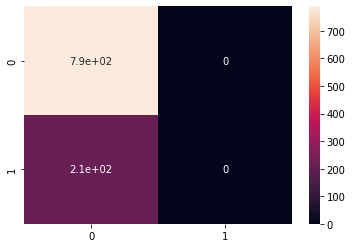

In [44]:
# Method 1 : Plotting the Confusion Matrix with Numeric Values using Seaborn heatmap() Function

churn_cm_plot_1 = sns.heatmap(cm_validation_matrix, annot=True)
churn_cm_plot_1

### Method 2 : Plotting the Confusion Matrix with Percentage Values using Seaborn heatmap() Function

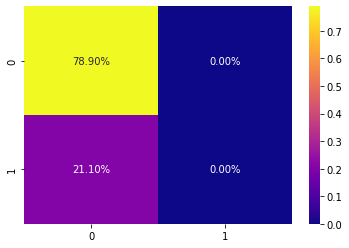

In [45]:
# Method 2 : Plotting the Confusion Matrix with Percentage Values Rounded-off to 2 Decimal Places using Seaborn heatmap() Function

churn_cm_plot_2 = sns.heatmap(cm_validation_matrix/np.sum(cm_validation_matrix), annot=True, fmt='0.2%', cmap='plasma')
churn_cm_plot_2

### Method 3 : Plotting the Confusion Matrix with Numeric Values, Percentage Values and the Corresponding Text using Seaborn heatmap() Function

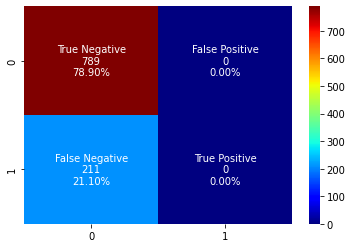

In [46]:
# Method 3 : Plotting the Confusion Matrix with Numeric Values, Percentage Values and the Corresponding Text using Seaborn heatmap() Function

cm_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

cm_counts = ["{0:0.0f}".format(value) for value in cm_validation_matrix.flatten()]

cm_percentages = ["{0:0.2%}".format(value) for value in cm_validation_matrix.flatten()/np.sum(cm_validation_matrix)]

cm_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(cm_names,cm_counts,cm_percentages)]

cm_labels = np.asarray(cm_labels).reshape(2,2)

sns.heatmap(cm_validation_matrix, annot=cm_labels, fmt='', cmap='jet')

## 13. CLASSIFICATION REPORT BETWEEN THE VALIDATION ACTUALS AND THE VALIDATION PREDICTIONS

In [47]:
# Classification Report and Metrics between the Validation Actuals and the Validation Predictions

target_names = ['No Churn', 'Churn']

# Defining the Classification Report for the Validation Data
classification_report_validation = classification_report(y_validate, y_validate_pred, target_names=target_names)

# Displaying the Classification Report
print(classification_report_validation)

              precision    recall  f1-score   support

    No Churn       0.79      1.00      0.88       789
       Churn       0.00      0.00      0.00       211

    accuracy                           0.79      1000
   macro avg       0.39      0.50      0.44      1000
weighted avg       0.62      0.79      0.70      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 14. INDIVIDUAL CLASSIFIER METRICS BETWEEN THE VALIDATION ACTUALS AND THE VALIDATION PREDICTIONS

In [48]:
# Individual Classifier Metrics between the Validation Actuals and the Validation Predictions

# Accuracy
churn_accuracy = round((accuracy_score(y_validate, y_validate_pred))*100, 2)

# F1-score
churn_f1_score = round((f1_score(y_validate, y_validate_pred)*100), 2)

# Precision
churn_precision = round((precision_score(y_validate, y_validate_pred)*100), 2)

# Recall
churn_recall = round((recall_score(y_validate, y_validate_pred)*100), 2)

# ROC AUC Score
churn_roc_auc_score = round((roc_auc_score(y_validate, y_validate_pred)*100), 2)

print("Customer Churn Classifier - Accuracy: {}%".format(churn_accuracy))
print("Customer Churn Classifier - F1-Score: {}%".format(churn_f1_score))
print("Customer Churn Classifier - Precision: {}%".format(churn_precision))
print("Customer Churn Classifier - Recall: {}%".format(churn_recall))
print("Customer Churn Classifier - ROC AUC Score: {}%".format(churn_roc_auc_score))

Customer Churn Classifier - Accuracy: 78.9%
Customer Churn Classifier - F1-Score: 0.0%
Customer Churn Classifier - Precision: 0.0%
Customer Churn Classifier - Recall: 0.0%
Customer Churn Classifier - ROC AUC Score: 50.0%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 15. TUNING THE VARIOUS COMBINATION OF THE PARAMETERS OF THE RANDOMIZEDSEARCHCV ALGORITHM : TO IDENTIFY THE BEST COMBINATION OF PARAMETERS OF THE ENSEMBLE - EXTREME GRADIENT BOOSTING (XGBOOST) CLASSIFIER

In [50]:

# Defining the Instance of XGBoost Classifier
xgboost_tune_model = XGBClassifier(tree_method='hist')

# Setting the Values of the Parameters to be used for Tuning the XGBoost Classifier
params={
       "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
       "max_depth":[2,3,4,5,6,8,10,12,15],
       "min_child_weight":[1,3,5,7],
       "gamma":[0.0,0.1,0.2,0.3,0.4],
       "colsample_bytree":[0.3,0.4,0.5,0.7]}

randomized_search_cv_tune_model = RandomizedSearchCV(xgboost_tune_model, param_distributions=params, n_iter=5, scoring='roc_auc', cv=5, verbose=3)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

print("Model Training Started.....")

# Fitting and Training the XGBoost Classifier Model based on its Parameters
randomized_search_cv_tune_model.fit(X_train, y_train)

print("Model Training Completed.....")  

Model Training Started.....
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.864 total time=   0.6s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.878 total time=   0.5s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.851 total time=   0.5s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.860 total time=   0.5s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.877 total time=   0.5s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=1;, score=0.857 total time=   1.8s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=1;, score=0.870 total time= 

## 16. EXTRACTING THE BEST COMBINATION OF PARAMETERS OF THE XGBOOST CLASSIFIER MODEL

In [51]:
# Extracting the Best Combination of Parameters of the XGBoost Classifier Model

randomized_search_cv_tune_model.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 1}

## 17. EXTRACTING THE XGBOOST CLASSIFIER MODEL WITH THE BEST COMBINATION OF PARAMETERS

In [52]:
# Extracting the XGBoost Classifier Model with the Best Combination of Parameters

randomized_search_cv_tune_model.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=6,
              tree_method='hist')

## 18. EXECUTING THE FINAL XGBOOST CLASSIFIER MODEL WITH THE BEST COMBINATION OF PARAMETERS

In [57]:
# Defining the Instance of XGBoost Classifier Final Model with the Best Parameters
xgboost_final_model = XGBClassifier(colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=6,
                                    tree_method='hist')

print("Finalized Model Training Started.....")

# Fitting and Training the Final XGBoost Classifier Model based on the Best Parameters Selected
xgboost_final_model.fit(X_train, y_train)

print("Finalized Model Training Completed.....")

Finalized Model Training Started.....
Finalized Model Training Completed.....


## 19. TRAINING VERSUS VALIDATION ACCURACY OF THE FINAL XGBOOST CLASSIFIER MODEL

In [58]:
# Accuracy on the Train Data for the Final XGBoost Classifier Model
print("Training Accuracy: ", xgboost_final_model.score(X_train, y_train))

# Accuracy on the Validation Data for the Final XGBoost Classifier Model
print("Validation Accuracy: ", xgboost_final_model.score(X_validate, y_validate))

Training Accuracy:  0.883
Validation Accuracy:  0.859


## 20. VALIDATING THE FINAL XGBOOST CLASSIFIER RESULTS ON THE VALIDATION DATA

In [59]:
# Predicting the Final XGBoost Classifier Model on the Validation Data

y_validate_final_pred = xgboost_final_model.predict(X_validate)

y_validate_final_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 21. COMPARING THE VALIDATION ACTUALS WITH THE VALIDATION PREDICTIONS OF THE FINAL XGBOOST CLASSIFIER MODEL

In [60]:
# Comparing the Validation Predictions with the Validation Actuals for the first 20 Data Instances for the Final XGBoost Classifier Model

# Validation Actuals
print(y_validate[:20])

# Validation Predictions
print(y_validate_final_pred[:20])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## 22. CONFUSION MATRIX BETWEEN THE VALIDATION ACTUALS AND THE VALIDATION PREDICTIONS OF THE FINAL XGBOOST CLASSIFIER MODEL

In [63]:
# Defining the Instance of Confusion Matrix for the Final XGBoost Classifier Model

cm_validation_final_matrix = confusion_matrix(y_validate, y_validate_final_pred)

print("Execution Completed")

Execution Completed


### Method 1 : Plotting the Confusion Matrix with Numeric Values using Seaborn heatmap() Function for the Final XGBoost Classifier Model

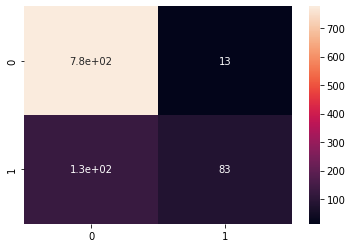

In [64]:
# Method 1 : Plotting the Confusion Matrix with Numeric Values using Seaborn heatmap() Function for the Final XGBoost Classifier Model

churn_cm_final_plot_1 = sns.heatmap(cm_validation_final_matrix, annot=True)
churn_cm_final_plot_1

### Method 2 : Plotting the Confusion Matrix with Percentage Values using Seaborn heatmap() Function for the Final XGBoost Classifier Model

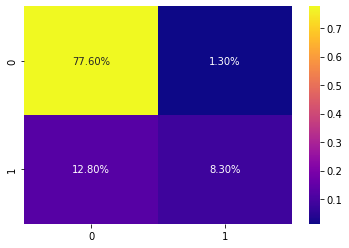

In [65]:
# Method 2 : Plotting the Confusion Matrix with Percentage Values Rounded-off to 2 Decimal Places using Seaborn heatmap() Function 
# for the Final XGBoost Classifier Model

churn_cm_final_plot_2 = sns.heatmap(cm_validation_final_matrix/np.sum(cm_validation_final_matrix), annot=True, fmt='0.2%', cmap='plasma')
churn_cm_final_plot_2

### Method 3 : Plotting the Confusion Matrix with Numeric Values, Percentage Values and the Corresponding Text using Seaborn heatmap() Function for the Final XGBoost Classifier Model

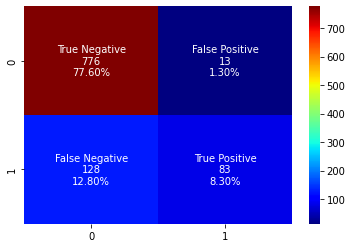

In [68]:
# Method 3 : Plotting the Confusion Matrix with Numeric Values, Percentage Values and the Corresponding Text using Seaborn heatmap() Function 
# for the Final XGBoost Classifier Model

cm_names_final = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

cm_counts_final = ["{0:0.0f}".format(value) for value in cm_validation_final_matrix.flatten()]

cm_percentages_final = ["{0:0.2%}".format(value) for value in cm_validation_final_matrix.flatten()/np.sum(cm_validation_final_matrix)]

cm_labels_final = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(cm_names_final,cm_counts_final,cm_percentages_final)]

cm_labels_final = np.asarray(cm_labels_final).reshape(2,2)

sns.heatmap(cm_validation_final_matrix, annot=cm_labels_final, fmt='', cmap='jet')

## 23. CLASSIFICATION REPORT BETWEEN THE VALIDATION ACTUALS AND THE VALIDATION PREDICTIONS FOR THE FINAL XGBOOST CLASSIFIER MODEL

In [69]:
# Classification Report and Metrics between the Validation Actuals and the Validation Predictions for the Final XGBoost Classifier Model

target_names_final = ['No Churn', 'Churn']

# Defining the Classification Report for the Validation Data for the Final XGBoost Classifier Model
classification_report_validation_final = classification_report(y_validate, y_validate_final_pred, target_names=target_names_final)

# Displaying the Classification Report for the Final XGBoost Classifier Model
print(classification_report_validation_final)

              precision    recall  f1-score   support

    No Churn       0.86      0.98      0.92       789
       Churn       0.86      0.39      0.54       211

    accuracy                           0.86      1000
   macro avg       0.86      0.69      0.73      1000
weighted avg       0.86      0.86      0.84      1000



## 24. INDIVIDUAL CLASSIFIER METRICS BETWEEN THE VALIDATION ACTUALS AND THE VALIDATION PREDICTIONS FOR THE FINAL XGBOOST CLASSIFIER MODEL

In [70]:
# Individual Classifier Metrics between the Validation Actuals and the Validation Predictions for the Final XGBoost Classifier Model

# Accuracy of the Final XGBoost Classifier Model
churn_accuracy_final = round((accuracy_score(y_validate, y_validate_final_pred))*100, 2)

# F1-score of the Final XGBoost Classifier Model
churn_f1_score_final = round((f1_score(y_validate, y_validate_final_pred)*100), 2)

# Precision of the Final XGBoost Classifier Model
churn_precision_final = round((precision_score(y_validate, y_validate_final_pred)*100), 2)

# Recall of the Final XGBoost Classifier Model
churn_recall_final = round((recall_score(y_validate, y_validate_final_pred)*100), 2)

# ROC AUC Score of the Final XGBoost Classifier Model
churn_roc_auc_score_final = round((roc_auc_score(y_validate, y_validate_final_pred)*100), 2)

print("Customer Churn Finalized XGBoost Classifier - Accuracy: {}%".format(churn_accuracy_final))
print("Customer Churn Finalized XGBoost Classifier - F1-Score: {}%".format(churn_f1_score_final))
print("Customer Churn Finalized XGBoost Classifier - Precision: {}%".format(churn_precision_final))
print("Customer Churn Finalized XGBoost Classifier - Recall: {}%".format(churn_recall_final))
print("Customer Churn Finalized XGBoost Classifier - ROC AUC Score: {}%".format(churn_roc_auc_score_final))

Customer Churn Finalized XGBoost Classifier - Accuracy: 85.9%
Customer Churn Finalized XGBoost Classifier - F1-Score: 54.07%
Customer Churn Finalized XGBoost Classifier - Precision: 86.46%
Customer Churn Finalized XGBoost Classifier - Recall: 39.34%
Customer Churn Finalized XGBoost Classifier - ROC AUC Score: 68.84%


### As we can see from the above results; the Ensemble - Extreme Gradient Boosting (XGBoost) Classifier Model tuned with the below parameters as 
> ### colsample_bytree = 0.5
> ### gamma = 0.1
> ### learning_rate = 0.05
> ### max_depth = 6
> ### tree_method = 'hist'

### has performed better in the validation data with the accuracy of about 86%.

### Hence this model can be considered as the Optimized Model for further deployment.